In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
# loading the dataset
car_dt = pd.read_csv('C:/Users/MACHIRA/Projects_With_Siddardhan/data/car_data.csv')
car_dt

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
#checking the number of rows and columns
car_dt.shape

(301, 9)

In [4]:
#get more info about the data set
car_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
#Statistical Overview
car_dt.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
#find any missing values
car_dt.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
car_dt['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [8]:
car_dt['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [9]:
car_dt['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

### Feature Engineering
#### Label encoding to categorical data

In [10]:
#encoding fuel type column
car_dt.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace=True)

#encoding Transmission column
car_dt.replace({'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace=True)

#encoding Seller_Type colum
car_dt.replace({'Seller_Type': {'Dealer': 0, 'Individual': 1}}, inplace=True)

car_dt.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


### Splitting the data into training and test data

In [11]:
X = car_dt.drop(columns=(['Car_Name','Selling_Price']), axis=1)
Y = car_dt['Selling_Price']

In [12]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [13]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [15]:
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

### Model Training
 ####  1. Linear Regression

In [17]:
#loading the linear regression model
linear_reg_mod = LinearRegression()

In [18]:
linear_reg_mod.fit(X_train, Y_train)

LinearRegression()

#### Model Evaluation

In [19]:
#prediction on Training data
training_dt_pred = linear_reg_mod.predict(X_train)

In [20]:
#R squared error
error_score = metrics.r2_score(Y_train, training_dt_pred)
print('R squared Error : ', error_score)

R squared Error :  0.8799451660493711


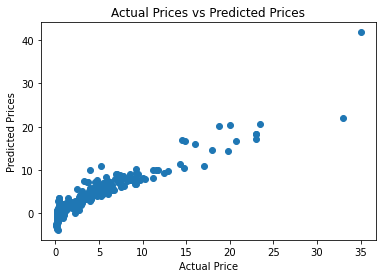

In [21]:
plt.scatter(Y_train, training_dt_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [22]:
#prediction on test data
test_dt_pred = linear_reg_mod.predict(x_test)

In [23]:
#R squared error
error_score_test = metrics.r2_score(y_test, test_dt_pred)
print('R squared Error : ', error_score_test)

R squared Error :  0.8365766715026396


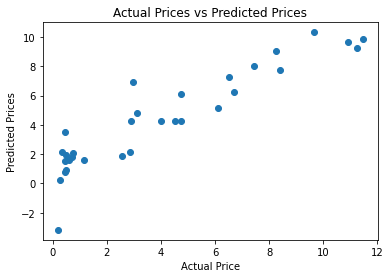

In [24]:
plt.scatter(y_test, test_dt_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

 ####  2. Lasso Regression

In [25]:
#loading the Lasso regression model
lasso_mod = Lasso()

In [26]:
lasso_mod.fit(X_train, Y_train)

Lasso()

#### Model Evaluation

In [28]:
#prediction on Training data
training_dt_pred = lasso_mod.predict(X_train)

In [29]:
#R squared error
error_score = metrics.r2_score(Y_train, training_dt_pred)
print('R squared Error : ', error_score)

R squared Error :  0.8427856123435794


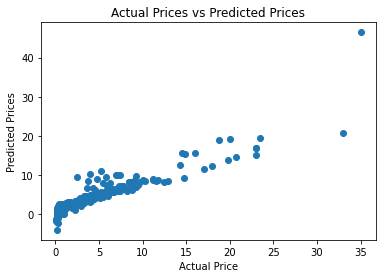

In [30]:
plt.scatter(Y_train, training_dt_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [31]:
#prediction on test data
test_dt_pred = lasso_mod.predict(x_test)

In [32]:
#R squared error
error_score_test = metrics.r2_score(y_test, test_dt_pred)
print('R squared Error : ', error_score_test)

R squared Error :  0.8709167941173195


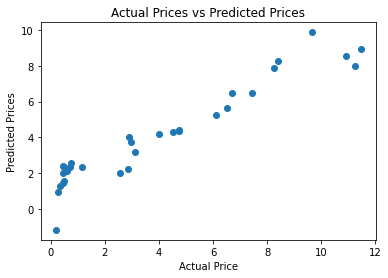

In [33]:
plt.scatter(y_test, test_dt_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()